<a href="https://colab.research.google.com/github/rbauza7/EXAMEN-FINAL-MINERIA/blob/main/EXAMENFINALEJERCICIO1BAUZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXAMEN FINAL MINERIA DE DATOS**

**Roberto Bauza Fermín CC 096210865-0** FECHA: 22-12-2024

 **INSTRUCCIONES:** Sírvase contestar completamente el examen. Asegúrese de comprender cada pregunta antes de proceder a responder. Anote debajo de cada pregunta todo el procedimiento realizado para llegar a su resultado, de lo contrario, el resultado será inválido. Crear un pdf un link de Google colab con los comandos, gráficos y resultados generados en R.

**PROBLEMA 1.**Se dispone de un conjunto de 10 facturas o transacciones de compras realizadas en Fybeca, que incluyen productos relacionados con el control de fiebre, tos y gripe. Utilizando un umbral de soporte de 0.5 y un umbral de confianza de 0.7, encuentra las reglas de asociación que puedan recomendar productos adicionales basados en las compras previas de estos productos. Justifica tu respuesta con el procedimiento, e interpreta los resultados obtenidos en términos de la relevancia y utilidad de las reglas de asociación para la recomendación de productos. Justificar con un archivo Excel o desarrollado a mano. 7.5 puntos

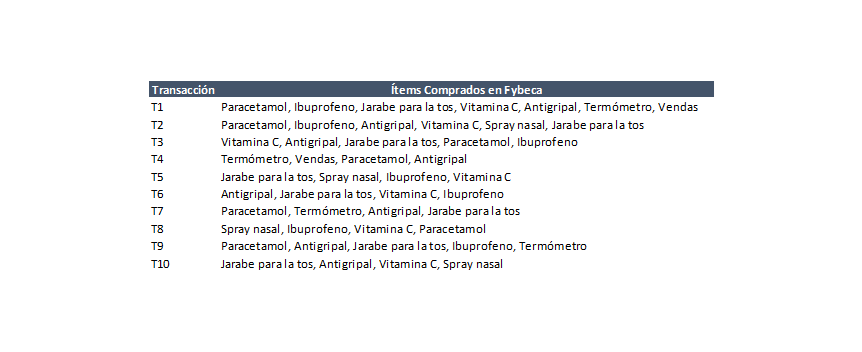

**Respuesta:** Es un planteamiento con base a reglas de asociación. Mi cunjunto de datos es: Facturas/transacciones relacionadas con:fiebre, tos y gripe. Mis umbrales serán: Soporte: 0,5 (al menos 50 % de la stransacciones) y confianza: 0,7 (correctas al menos en un 70 %de los casos).Mi objetivo es: Encontrar patrones de productos que se compren juntos para hacer recomendaciones.

**Preparación en R**

In [1]:
# Instalar R en Google Colab
!apt-get install -y r-base

# Instalar IRKernel para usar R
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel'); IRkernel::installspec(user = FALSE)
Installing package into ‘/usr/local

**Configurnado tabla-transacciones en el ambiente**

In [1]:
# Crear un DataFrame con las transacciones
transacciones <- data.frame(
  Transaccion = paste0("T", 1:10),
  Items = c(
    "Paracetamol, Ibuprofeno, Jarabe para la tos, Vitamina C, Antigripal, Termómetro, Vendas",
    "Paracetamol, Ibuprofeno, Antigripal, Vitamina C, Spray nasal, Jarabe para la tos",
    "Vitamina C, Antigripal, Jarabe para la tos, Paracetamol, Ibuprofeno",
    "Termómetro, Vendas, Paracetamol, Antigripal",
    "Jarabe para la tos, Spray nasal, Ibuprofeno, Vitamina C",
    "Antigripal, Jarabe para la tos, Vitamina C, Ibuprofeno",
    "Paracetamol, Termómetro, Antigripal, Jarabe para la tos",
    "Spray nasal, Ibuprofeno, Vitamina C, Paracetamol",
    "Paracetamol, Antigripal, Jarabe para la tos, Ibuprofeno, Termómetro",
    "Jarabe para la tos, Antigripal, Vitamina C, Spray nasal"
  )
)

# Mostrar la tabla
print(transacciones)


   Transaccion
1           T1
2           T2
3           T3
4           T4
5           T5
6           T6
7           T7
8           T8
9           T9
10         T10
                                                                                     Items
1  Paracetamol, Ibuprofeno, Jarabe para la tos, Vitamina C, Antigripal, Termómetro, Vendas
2         Paracetamol, Ibuprofeno, Antigripal, Vitamina C, Spray nasal, Jarabe para la tos
3                      Vitamina C, Antigripal, Jarabe para la tos, Paracetamol, Ibuprofeno
4                                              Termómetro, Vendas, Paracetamol, Antigripal
5                                  Jarabe para la tos, Spray nasal, Ibuprofeno, Vitamina C
6                                   Antigripal, Jarabe para la tos, Vitamina C, Ibuprofeno
7                                  Paracetamol, Termómetro, Antigripal, Jarabe para la tos
8                                         Spray nasal, Ibuprofeno, Vitamina C, Paracetamol
9               

**Convertir los datos al formato transaccional**

Necesito que las transacciones estén en el formato que reconoce la librería arules

In [2]:
install.packages("arules")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(arules)


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Usaré la columna Items de mi tabla para crear las transacciones:

In [4]:
# Dividir los productos en una lista
lista_transacciones <- strsplit(transacciones$Items, ", ")

# Convertir al formato transaccional
transacciones_arules <- as(lista_transacciones, "transactions")

# Resumen de las transacciones
summary(transacciones_arules)


transactions as itemMatrix in sparse format with
 10 rows (elements/itemsets/transactions) and
 8 columns (items) and a density of 0.5875 

most frequent items:
        Antigripal Jarabe para la tos         Ibuprofeno        Paracetamol 
                 8                  8                  7                  7 
        Vitamina C            (Other) 
                 7                 10 

element (itemset/transaction) length distribution:
sizes
4 5 6 7 
6 2 1 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0     4.0     4.0     4.7     5.0     7.0 

includes extended item information - examples:
              labels
1         Antigripal
2         Ibuprofeno
3 Jarabe para la tos

**Observación:** Los datos muestran 10 transacciones con 7 productos. Cada transacción contiene entre 4 y 7 ítems, con un promedio de 4.7 productos por transacción. Lo quie veo es que los clientes compran (generlamente) varios productos relacionados. Los ítems incluyen: Antigripal, Ibuprofeno y Jarabe para la tos.

**Generar Reglas de Asociación**

Voy a aplicar el algoritmo a priori con los umbrales que se me ha dado.

In [5]:
# Generar las reglas de asociación con soporte y confianza mínimos
reglas <- apriori(transacciones_arules, parameter = list(supp = 0.5, conf = 0.7))

# Mostrar un resumen de las reglas generadas
summary(reglas)

# Inspeccionar las reglas generadas
inspect(reglas)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [32 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 32 rules

rule length distribution (lhs + rhs):sizes
 1  2  3 
 5 15 12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.219   3.000   3.000 

summary of quality measures:
    support        confidence        coverage          lift       
 Min.   :0.500   Min.   :0.7000   Min.   :0.500   Min.   :0.8929  
 1st Qu.:0.500   1st Qu.:0.7143   1st Qu.:0.600   1st Qu.:1.0153  
 Median :0.500   Median :0.8167   Median :0.700   Median :1.0417  
 Mean   :0.575   Mean   :0.8031   Mean   :0.725   Mean   :1.0670  
 3rd Qu.:0.600   3rd Qu.:0.8571   3rd Qu.:0.800   3rd Qu.:1.0938  
 Max.   :0.800   Max.   :1.0000   Max.   :1.000   Max.   :1.2500  
     count     
 Min.   :5.00  
 1st Qu.:5.00  
 Median :5.00  
 Mean   :5.75  
 3rd Qu.:6.00  
 Max.   :8.00  

mining info:
                 data ntransactions support confidence
 transacciones_arules            10     0.5        0.7
                                                                           call
 aprio

     lhs                                  rhs                  support
[1]  {}                                => {Vitamina C}         0.7    
[2]  {}                                => {Ibuprofeno}         0.7    
[3]  {}                                => {Paracetamol}        0.7    
[4]  {}                                => {Jarabe para la tos} 0.8    
[5]  {}                                => {Antigripal}         0.8    
[6]  {Vitamina C}                      => {Ibuprofeno}         0.6    
[7]  {Ibuprofeno}                      => {Vitamina C}         0.6    
[8]  {Vitamina C}                      => {Jarabe para la tos} 0.6    
[9]  {Jarabe para la tos}              => {Vitamina C}         0.6    
[10] {Vitamina C}                      => {Antigripal}         0.5    
[11] {Ibuprofeno}                      => {Paracetamol}        0.5    
[12] {Paracetamol}                     => {Ibuprofeno}         0.5    
[13] {Ibuprofeno}                      => {Jarabe para la tos} 0.6    
[14] {

**Observaciones:** La salida muestra  32 reglas de asociación con los parámetros de soporte (≥ 0.5) y confianza (≥ 0.7). Estas reglas destacan relaciones entre los productos más comunes. Por ejemplo, se observa como Jarabe para la tos, antigripal, e ibuprofeno. La confianza promedio de las reglas es 0.8, y el lift promedio de 1.067 me dice que estas combinaciones son útiles para recomendaciones. Las reglas más fuertes, con un lift máximo de 1.25, me dice que las relaciones altamente relevantes son: antigripal, vitamina C, luego jarabe para la tos. Esto confirma patrones de compra que pueden ser estratégicos para sugerencias comerciales.

**Visualización de las Reglas**

Voy a instalar lo necesario...

In [6]:
install.packages("arulesViz")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(arulesViz)


Voy a visualizar...

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



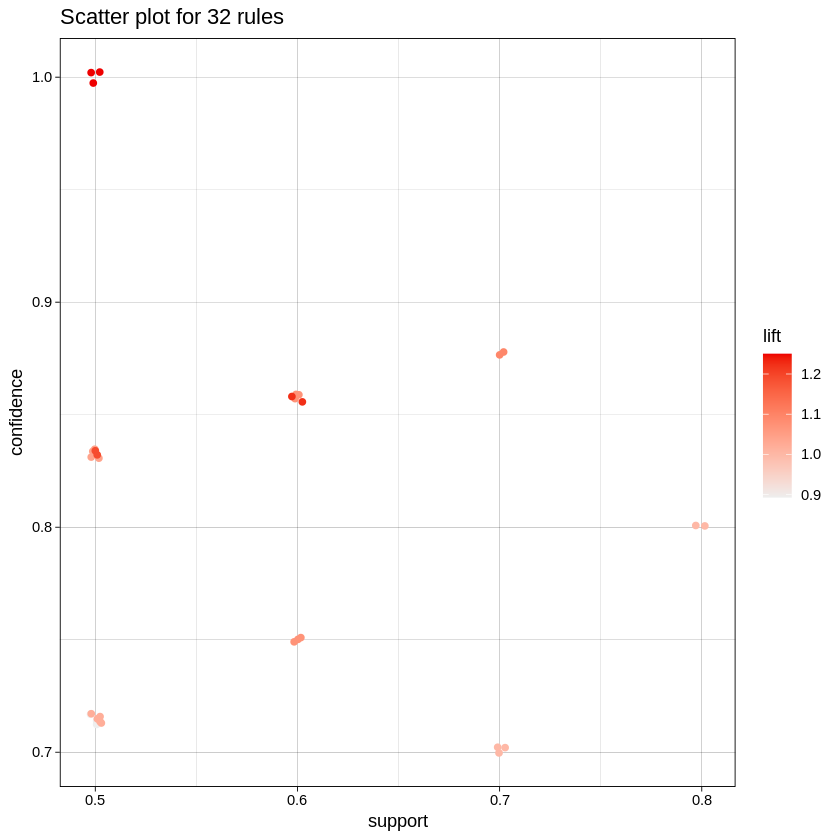

In [8]:
plot(reglas, method = "scatterplot", measure = c("support", "confidence"))


In [9]:
plot(reglas, method = "graph", engine = "htmlwidget")


HTML widgets cannot be represented in plain text (need html)

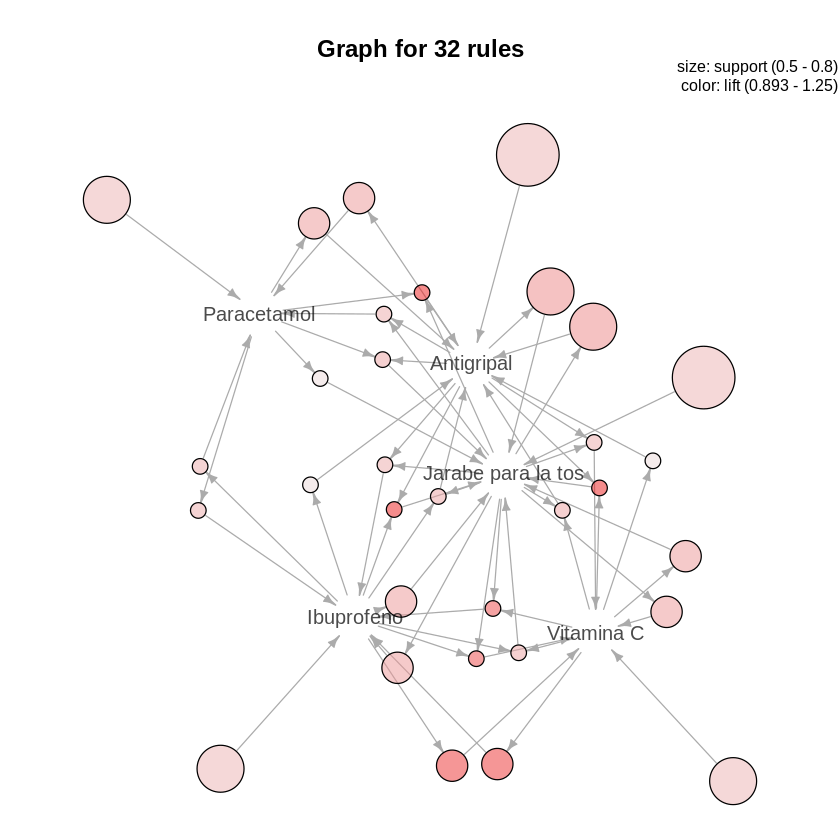

In [10]:
plot(reglas, method = "graph", engine = "igraph")


El gráfico me muestra que productos como Jarabe para la tos y Antigripal tienen conexiones importante con otros ítems,evidencia su alta frecuencia y relevancia en las transacciones. Las combinaciones alrededor de estos nodos centrales pueden ser clave para estrategias de recomendación.

**Interpretación de resultados**

El análisis realizado sobre las transacciones identificó 32 reglas de asociación significativas con soporte mayor o igual a 0.5 y confianza mínima de 0.7. Entre los productos más destacados se encuentran el jarabe para la tos y el antigripal,  aparecen como items centrales en las combinaciones, indicando su alta frecuencia y relevancia en las transacciones. Las reglas más relevantes incluyen (Ibuprofeno, Vitamina C) y (Jarabe para la tos) y (Antigripal, Vitamina C) con (jarabe para la tos), ambas con un lift de 1.25, lo que indica una fuerte conexión y utilidad para estrategias de recomendación. El gráfico generado muestra una red de relaciones donde los nodos más grandes representan los productos más frecuentes y las conexiones resaltan las combinaciones más importantes. Estas asociaciones pueden usarse para recomendaciones de productos en puntos de venta,  especialmente aquellos que tienden a comprarse en conjunto.